## Data Loading and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
ins_df= pd.read_csv(r"C:\Users\lenovo\Downloads\Insurance Dataset.csv")
ins_df

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [3]:
# check null values in each column
ins_df.isnull().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

In [4]:
# remove null values
ins_df['Area_Service'].fillna(ins_df['Area_Service'].mode().iloc[0], inplace= True)
ins_df['Hospital County'].fillna(ins_df['Hospital County'].mode().iloc[0], inplace= True)
ins_df['Hospital Id'].fillna(ins_df['Hospital Id'].median(), inplace= True)
ins_df['Mortality risk'].fillna(ins_df['Mortality risk'].median(), inplace= True)

In [5]:
# Now again check null values 
ins_df.isnull().sum()

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [6]:
# replace wight_baby(0) to weight_baby(200)
ins_df.loc[ins_df['Weight_baby']== 0,'Weight_baby']=200
ins_df.head(4)

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,200,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,200,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,200,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,200,N,Y,1108.20,1644.75,1.484167,0,1


In [7]:
ins_df.loc[ins_df['Weight_baby']== 0,'Weight_baby']=200
ins_df.head(4)

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,200,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,200,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,200,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,200,N,Y,1108.20,1644.75,1.484167,0,1


In [8]:
# 1. How many rows and columns are in the dataset?
print(ins_df.shape)

(1048575, 24)


In [9]:
# 2. What are the unique values in the 'Area_Service' column?
ins_df['Area_Service'].unique()

array(['Western NY', 'Hudson Valley', 'Finger Lakes', 'Central NY',
       'Southern Tier', 'Capital/Adirond', 'New York City'], dtype=object)

In [10]:
# 3. How many hospitals are in each 'Hospital Country'?
ins_df['Hospital County'].value_counts()

Erie           131698
Westchester    127008
Monroe         110592
Onondaga        81249
Bronx           74629
Albany          61764
Orange          39756
Rockland        35695
Oneida          34165
Dutchess        32277
Broome          29853
Schenectady     23245
Niagara         21075
Chemung         16735
Warren          15557
Rensselaer      13889
Ulster          13615
Otsego          13212
Chautauqua      12780
St Lawrence     12278
Ontario         12024
Jefferson       11943
Clinton          9923
Saratoga         8955
Steuben          8831
Putnam           7019
Tompkins         6992
Montgomery       6459
Columbia         6332
Oswego           6110
Franklin         5875
Cattaraugus      5793
Sullivan         5704
Cayuga           5685
Madison          5095
Genesee          4977
Cortland         4888
Wayne            4135
Fulton           3527
Wyoming          2419
Livingston       2122
Orleans          2102
Allegany         2071
Chenango         1996
Lewis            1925
Delaware  

In [1]:
# 4. Name of top 5 country having maximum number of hospitals
plt.figure(figsize=(10,5))
plt.bar(x= list(ins_df['Hospital County'].value_counts()[0:5].keys()),y= list(ins_df['Hospital County'].value_counts()[0:5]),
        color=["red", "yellow", "blue","green", "pink"])
plt.show()

NameError: name 'plt' is not defined

In [12]:
# 5. How many patients are male and how many are female?
ins_df['Gender'].value_counts()

F    593506
M    455019
U        50
Name: Gender, dtype: int64

In [13]:
# 6. What is the most common cultural group among patients?
ins_df['Cultural_group'].mode().values[0]

'White'

In [14]:
# 7. What is the max number of days spent in the hospital?
ins_df['Days_spend_hsptl'].max()

'99'

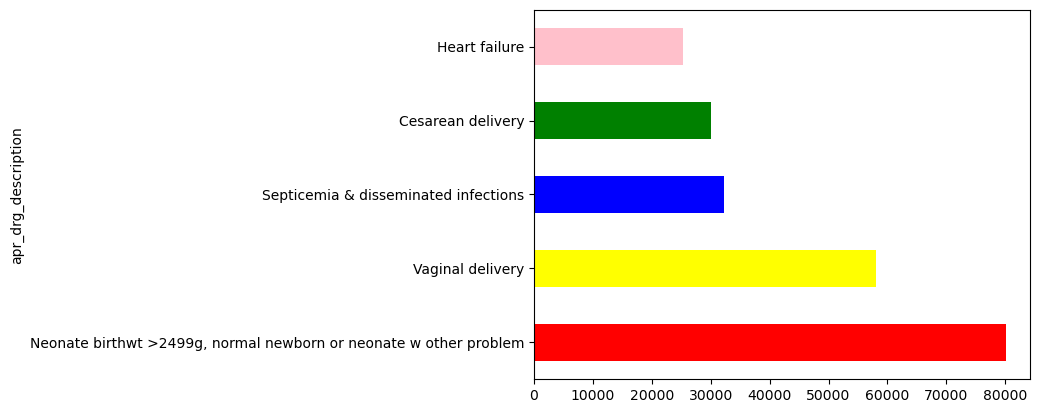

In [16]:
# 8.Top 5 description of the diagnosis-related group (DRG) who spend max days in hospital 
ins_df.groupby('apr_drg_description')['Days_spend_hsptl'].count().sort_values(ascending= False)[0:5].plot(kind='barh',
                                                                            color=["red", "yellow", "blue","green", "pink"])
plt.show()

<Axes: >

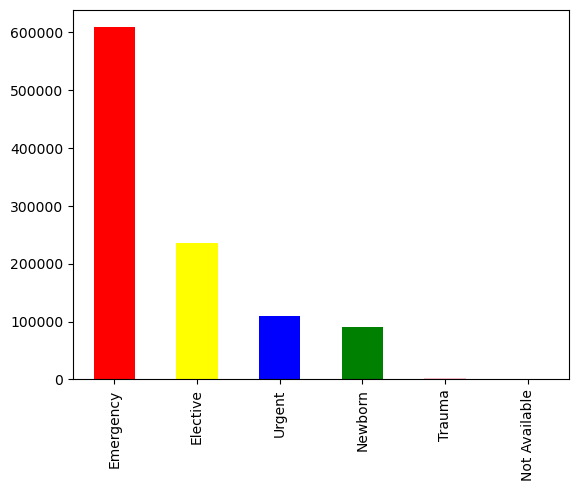

In [17]:
# 9. What are the different admission types and their frequency
ins_df['Admission_type'].value_counts().plot(kind='bar',color=["red", "yellow", "blue","green", "pink"])

In [18]:
# 10. Top 5 most common ccs_diagnosis_codes
ins_df['ccs_diagnosis_code'].value_counts().head(5)

218    90598
2      36311
657    34044
203    28221
122    26459
Name: ccs_diagnosis_code, dtype: int64

In [19]:
# 11. How many surgeries are described as 'Major'?
medical_surgeries_count = ins_df[ins_df['Surg_Description'] == 'Medical'].shape[0]
print("Number of Medical Surgeries:", medical_surgeries_count)

Number of Medical Surgeries: 805729


In [20]:
# 12. What is the average weight of babies?
average_weight_baby = ins_df['Weight_baby'].mean()
print(average_weight_baby)

475.47442958300553


In [21]:
# 13. How many records indicate abortion?
abortion_count = (ins_df['Abortion'] == 'Y').sum()
print(abortion_count)

1465


<Axes: xlabel='Surg_Description'>

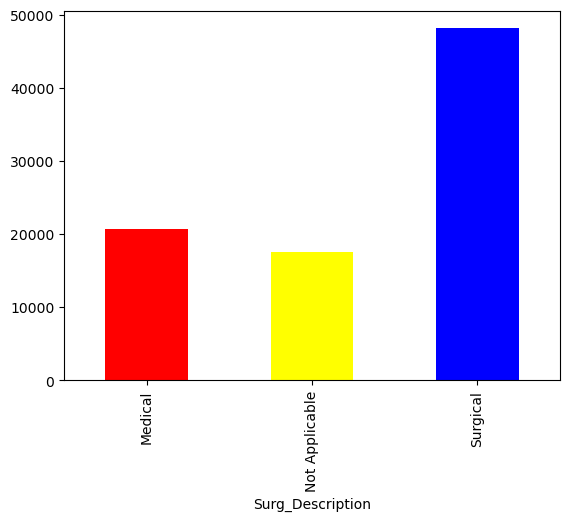

In [22]:
# 14. Avg total charge w.r.t surg_description 
ins_df.groupby('Surg_Description')['Tot_charg'].mean().plot(kind='bar',color=['red','yellow','blue'])

In [23]:
# 15. How many cases involve abortion ('Abortion')?
abortion_cases = ins_df[ins_df['Abortion'] == 'Y'].shape[0]
print("Cases Involving Abortion:", abortion_cases)

Cases Involving Abortion: 1465


In [24]:
# 16. Calculate the ratio of 'Tot_cost' to 'Tot_charg' for each record.
ins_df['Cost_to_Charge_Ratio'] = ins_df['Tot_cost'] / ins_df['Tot_charg']
print('Ration',ins_df['Cost_to_Charge_Ratio'])

Ration 0          1.012798
1          1.079365
2          1.059379
3          1.484164
4          0.986159
             ...   
1048570    0.199522
1048571    0.288382
1048572    0.236516
1048573    0.245846
1048574    0.200331
Name: Cost_to_Charge_Ratio, Length: 1048575, dtype: float64


In [25]:
# 17. What is the frequency of result distribution
ins_df['Result'].value_counts()

1    786407
0    262168
Name: Result, dtype: int64

<Axes: >

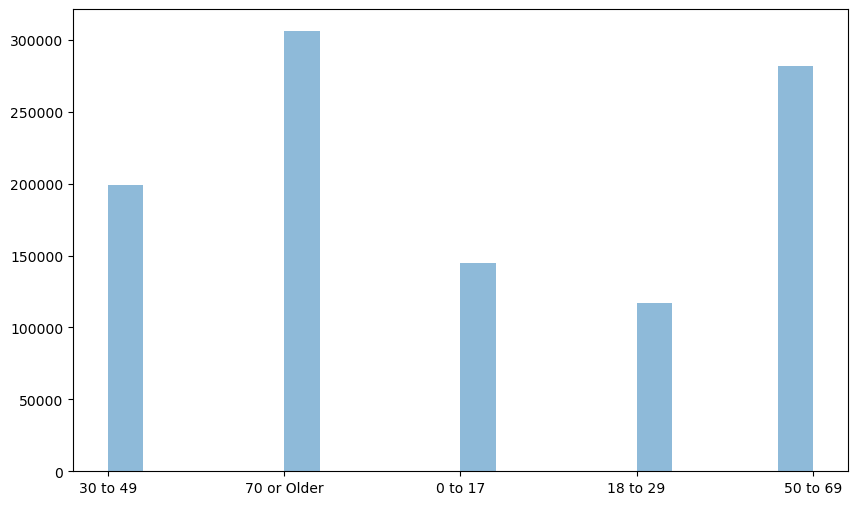

In [26]:
# 18. Plot the distribution of patients by age
plt.figure(figsize=(10, 6))
ins_df['Age'].hist(bins=20, alpha=0.5, label='Age', grid= False,)

In [27]:
# 19. What are the most common admission types?
list(ins_df['Admission_type'].value_counts()[0:1].keys())

['Emergency']

In [28]:
# 20. Who spend more days in hospital male/female
list(ins_df.groupby('Gender')['Days_spend_hsptl'].count()[0:1].keys())

['F']

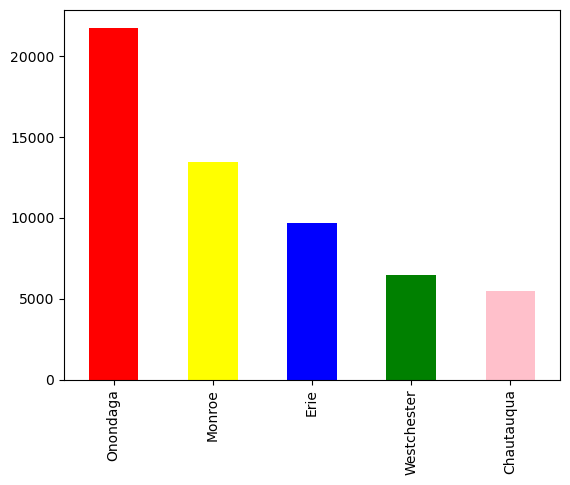

In [29]:
# 21. Top 5 country having maximum urgent case
ins_df[ins_df.Admission_type=='Urgent']['Hospital County'].value_counts()[0:5].plot(kind='bar',
                                                color=["red", "yellow", "blue","green", "pink"])
plt.show()

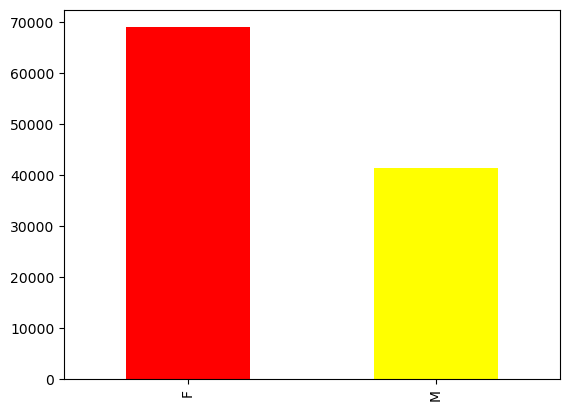

In [30]:
# 22.Frequency of urgent case in male and female
ins_df[ins_df.Admission_type=='Urgent']['Gender'].value_counts().plot(kind='bar',
                                            color=["red", "yellow"])
plt.show()

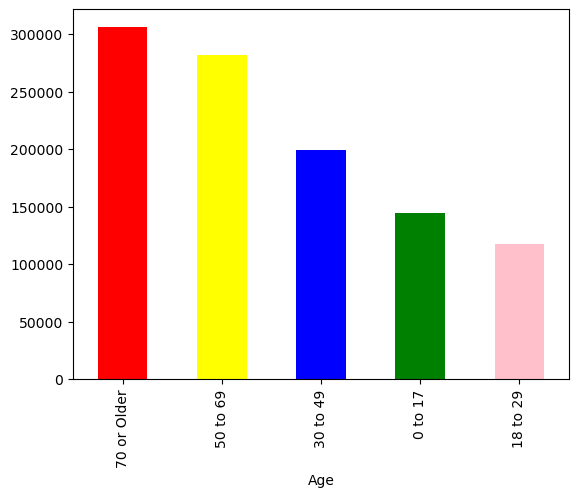

In [31]:
# 23. Frequency of days spend in hspital age_wise
ins_df.groupby('Age')['Days_spend_hsptl'].count().sort_values(ascending=False).plot(kind='bar',
                                                color=["red", "yellow", "blue","green", "pink"])
plt.show()

In [32]:
# 24.Frequency of Admission_type having age 70 or Older
ins_df[ins_df.Age=='70 or Older']['Admission_type'].value_counts()

Emergency        228990
Elective          47020
Urgent            29324
Trauma              478
Not Available       200
Newborn               5
Name: Admission_type, dtype: int64

In [33]:
# 25.Find out which age group spend more time in hsptl
list(ins_df.groupby('Age')['Days_spend_hsptl'].count().sort_values(ascending=False)[0:1].keys())

['70 or Older']

In [34]:
# 26.Find out which age group spend less time in hsptl
list(ins_df.groupby('Age')['Days_spend_hsptl'].count().sort_values(ascending=True)[0:1].keys())

['18 to 29']

In [35]:
# 27. Find out which admission type has max tot charg 
ins_df[['Admission_type','Tot_charg']].sort_values(by='Tot_charg',ascending=False)[0:1]

,Admission_type,Tot_charg
970410,Emergency,6196973.5


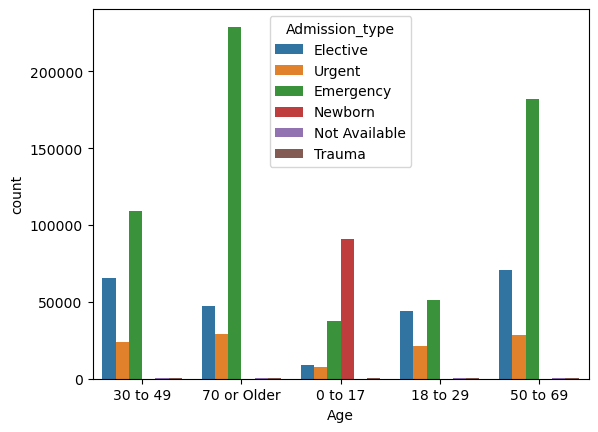

In [36]:
# 28. Plot distribution of age w.r.t admission type 
sns.countplot(x='Age',data= ins_df, hue= 'Admission_type')
plt.show()

In [ ]:
1. How many rows and columns are in the dataset?
2. What are the unique values in the 'Area_Service' column?
3. How many hospitals are in each 'Hospital Country'?
4. Name of top 5 country having maximum number of hospitals
5. How many patients are male and how many are female?
6. What is the most common cultural group among patients?
7. What is the max number of days spent in the hospital?
8.Top 5 description of the diagnosis-related group (DRG) who spend max days in hospital 
9. What are the different admission types and their frequency
10. Top 5 most common ccs_diagnosis_codes
11. How many surgeries are described as 'Major'?
12. What is the average weight of babies?
13. How many records indicate abortion?
14. Avg total charge w.r.t surg_description 
15. How many cases involve abortion ('Abortion')?
16. Calculate the ratio of 'Tot_cost' to 'Tot_charg' for each record.
17. What is the frequency of result distribution
18. Plot the distribution of patients by age
19. What are the most common admission types?
20. Who spend more days in hospital male/female
21. Top 5 country having maximum urgent case
22.Frequency of urgent case in male and female
23. Frequency of days spend in hspital age_wise
24.Frequency of Admission_type having age 70 or Older
25.Find out which age group spend more time in hsptl
26.Find out which age group spend less time in hsptl
27. Find out which admission type has max tot charg
28. Plot distribution of age w.r.t admission type 